In [61]:
import os, pathlib
import pandas as pd
import sklearn as sk
import csv
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from matplotlib import pyplot as plt

import statsmodels.api as sm

In [2]:
base_dir = os.getcwd()

In [3]:
data = pd.read_csv(base_dir + '/' + 'data/Boston.csv')

In [4]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Simple Linear Regression

In [5]:
X = data['lstat'].to_numpy()
X = np.expand_dims(X, axis=-1)

y = data['medv'].to_numpy()
y = np.expand_dims(y, axis=-1)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [7]:
# get the intercept and coef of linear model
b0, b1 = lin_reg.intercept_, lin_reg.coef_

In [8]:
b0, b1

(array([34.55384088]), array([[-0.95004935]]))

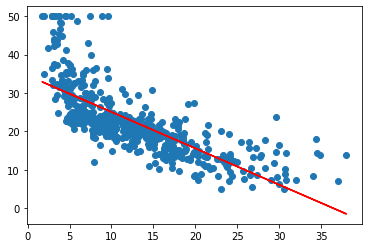

In [15]:
# Plot the data point and linear regression model 
plt.plot(X, lin_reg.predict(X), 'r')
plt.scatter(X, y)

In [16]:
# Compute the  Residual Standard Error (RSE)
def RSE(X, y):
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_hat = lin_reg.predict(X)
    return np.sqrt(np.sum((y - y_hat)**2) / (X.size - 2))

In [17]:
RSE(X, y)

6.215760405398069

In [23]:
# Compute the RSS
def RSS(X, y):
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_hat = lin_reg.predict(X)
    return np.sum((y - y_hat)**2)

In [24]:
# Compute  the Total Sum of Squares (TSS)
def TSS(y):
    return y.var() * y.size 

In [67]:
TSS(y)

42716.29541501977

In [26]:
# Compute the  R^2
def R_square(X, y):
    tss = TSS(y)
    rss = RSS(X, y)
    return 1 - rss/tss

In [27]:
R_square(X, y)

0.5441462975864797

In [30]:
X.shape[0]

506

In [31]:
# Compute the  F-statistics
def F_stats(X, y):
    tss = TSS(y)
    rss = RSS(X, y)
    p = X.shape[-1]
    n = X.shape[0]
    return ((tss - rss) / p) / (rss / (n - p - 1))

In [32]:
F_stats(X, y)

601.6178711098953

In [53]:
stats.t.pdf(601, 1, 504)

3.38267679260139e-05

In [55]:
score, pvalue = f_regression(X, y)

/home/ruidong/miniconda3/envs/dpl/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
score, pvalue

(array([601.61787111]), array([5.08110339e-88]))

In [62]:
est = sm.OLS(y, X)

In [65]:
est2 = est.fit()

In [66]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    2.71e-67
Time:                        22:13:52   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""